# Classification Methods Visualization

This notebook will guide you through the process of using logistic regression, LDA and QDA for classification tasks. You will start with a binary classification problem and attempt to solve it using logistic regression. You will then extend it to a more complicated dataset to classify it using LDA and QDA

#### Objectives:

- Implement logistic regression for binary classification.
- Understand differences between LDA and QDA.
- Implement LDA and QDA for multivariate data.

---

#### Imports and plotting function

In [123]:
## Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [124]:
import matplotlib as mpl
from matplotlib import colors

from sklearn.inspection import DecisionBoundaryDisplay

cmap = colors.ListedColormap(["tab:red", "tab:blue"])

def plot_ellipse(mean, cov, color, ax):
    v, w = np.linalg.eigh(cov)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        angle=180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.4)
    ax.add_artist(ell)


def plot_result(estimator, X, y, ax):
    cmap = colors.ListedColormap(["tab:red", "tab:blue"])
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="predict_proba",
        plot_method="pcolormesh",
        ax=ax,
        cmap="RdBu",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="predict_proba",
        plot_method="contour",
        ax=ax,
        alpha=1.0,
        levels=[0.5],
    )
    y_pred = estimator.predict(X)
    X_right, y_right = X[y == y_pred], y[y == y_pred]
    X_wrong, y_wrong = X[y != y_pred], y[y != y_pred]
    ax.scatter(X_right[:, 0], X_right[:, 1], c=y_right, s=20, cmap=cmap, alpha=0.5)
    ax.scatter(
        X_wrong[:, 0],
        X_wrong[:, 1],
        c=y_wrong,
        s=30,
        cmap=cmap,
        alpha=0.9,
        marker="x",
    )
    ax.scatter(
        estimator.means_[:, 0],
        estimator.means_[:, 1],
        c="yellow",
        s=200,
        marker="*",
        edgecolor="black",
    )

    if isinstance(estimator, LinearDiscriminantAnalysis):
        covariance = [estimator.covariance_] * 2
    else:
        covariance = estimator.covariance_
    plot_ellipse(estimator.means_[0], covariance[0], "tab:red", ax)
    plot_ellipse(estimator.means_[1], covariance[1], "tab:blue", ax)

    ax.set_box_aspect(1)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set(xticks=[], yticks=[])

#### Logistic Regression for Classification

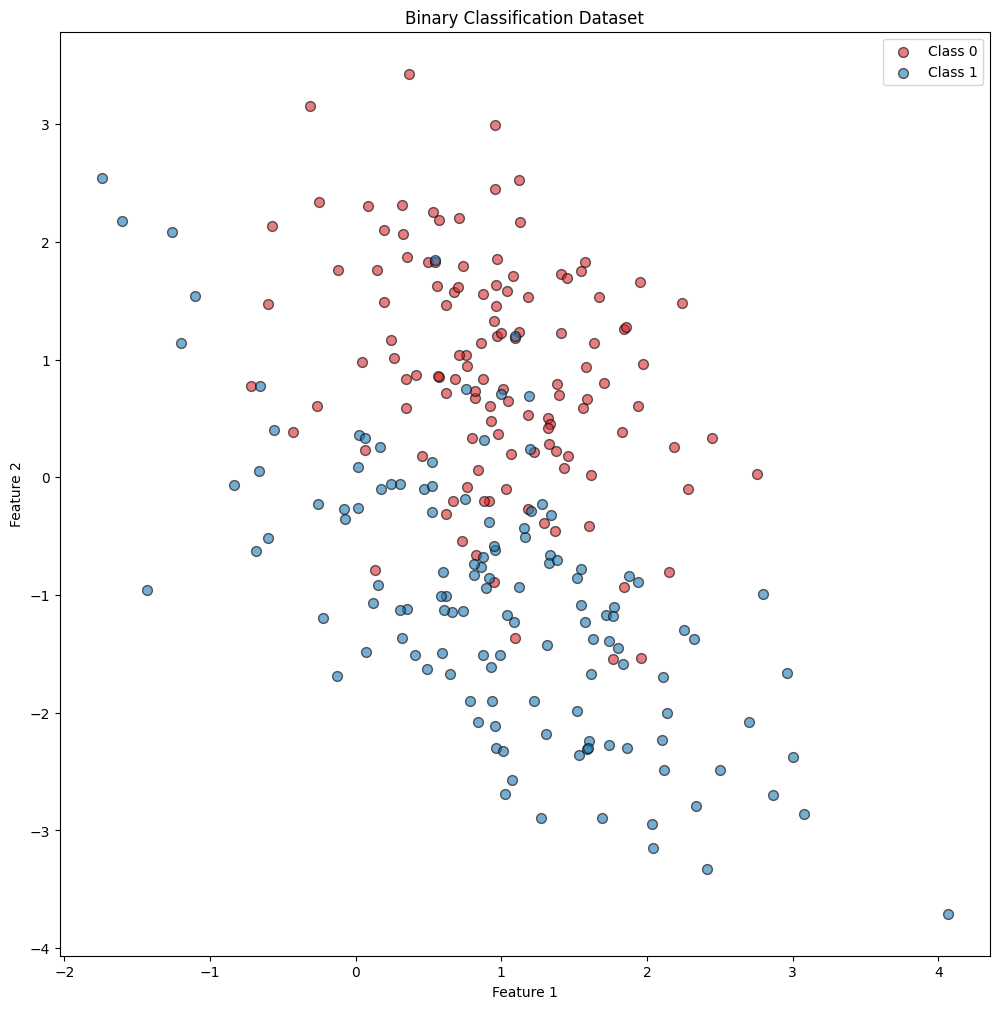

In [125]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=250, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=1)

# Visualize the dataset
plt.figure(figsize=(12,12))
# Plot points for Class 0
plt.scatter(X[y == 0, 0], X[y == 0, 1], color=cmap(0.1), s=50, label='Class 0', alpha=0.6, edgecolors='k')
# Plot points for Class 1
plt.scatter(X[y == 1, 0], X[y == 1, 1], color=cmap(0.9), s=50, label='Class 1', alpha=0.6, edgecolors='k')
plt.title('Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Class 0', 'Class 1'])
plt.show()


**Exercise 1:** Check range of outputs by plotting the histogram of them comment on the reason of the interval. (2 Points)

[0.97333883 0.97035147 0.55347298 0.97557501 0.01230559 0.93401719
 0.58676227 0.32188573 0.10803717 0.01225671 0.52958399 0.10482093
 0.96647221 0.94984434 0.89640252 0.94689702 0.00880082 0.84730137
 0.06347382 0.59252698 0.23785449 0.06928321 0.91092922 0.91772179
 0.6062103  0.6839371  0.90776935 0.22778492 0.98716688 0.9466147
 0.59130061 0.61697938 0.95642479 0.86098877 0.26290715 0.99127696
 0.67301658 0.01002943 0.36588945 0.97066562 0.97389456 0.05540185
 0.86901184 0.19211826 0.02067372 0.19581176 0.90548911 0.11359045
 0.5864306  0.99015884 0.9636229  0.50433741 0.95126703 0.30095533
 0.96710786 0.17641256 0.63766979 0.83977423 0.51679321 0.9495454
 0.08688326 0.12244962 0.14961777 0.92350721 0.82258589 0.03836448
 0.23144924 0.98692309 0.03751102 0.25606101 0.87620291 0.86015256
 0.14095237 0.27233066 0.9473306 ]


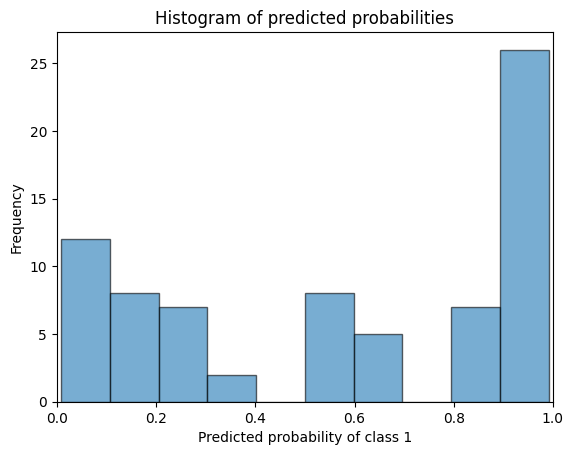

In [126]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a linear regression model
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_prob_all = logistic_regressor.predict_proba(X_test)

# Select only the probabilities for class 1
y_pred_prob = y_pred_prob_all[:, 1]

# TODO - Print histogram of predicted probabilities
#y_pred_prob = #TODO
# the interval is between 0 and 1 because in linear regression we are working with probabilities and the probabilities are always between 0 and 1
#we did the linear regression with class 1 and then did a plot on it, so the histogram is just showing us the probabilities.
print(y_pred_prob)
plt.hist(y_pred_prob, bins=10, edgecolor= 'k', alpha=0.6)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of class 1')
plt.ylabel('Frequency')
plt.show()

**Exercise 2:** Convert the probability predictions to binary class labels using 0.5 as threshold and compute Type-1 and Type-2 error. (2 Points)

Accuracy of Linear Regression Classifier: 0.88
Type I Error Rate (False Positive Rate): 0.21
Type II Error Rate (False Negative Rate): 0.05


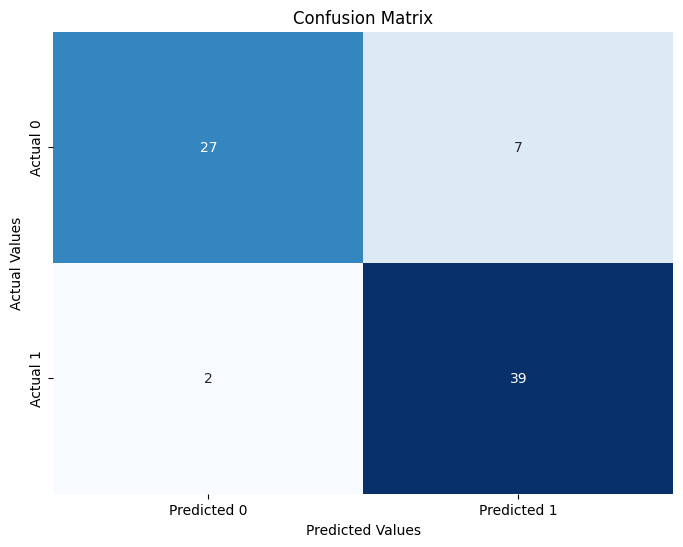

In [127]:
y_pred_class=[]
for prob in y_pred_prob:
    if prob>=0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy of Linear Regression Classifier: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)

FP = cm[0, 1]  # False Positive
FN = cm[1, 0]  # False Negative
TN = cm[0, 0]  # True Negative
TP = cm[1, 1]  # True Positive

# Calculate Type I and Type II error rates
type1_error_rate = FP / (FP+TN) #False Positive Rate
type2_error_rate = FN / (FN+TP) #False negative Rate

print(f'Type I Error Rate (False Positive Rate): {type1_error_rate:.2f}')
print(f'Type II Error Rate (False Negative Rate): {type2_error_rate:.2f}')

# Visualize the confusion matrix with heatmap
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


**Exercise 3:** Determine correct predictions. (1 Point)

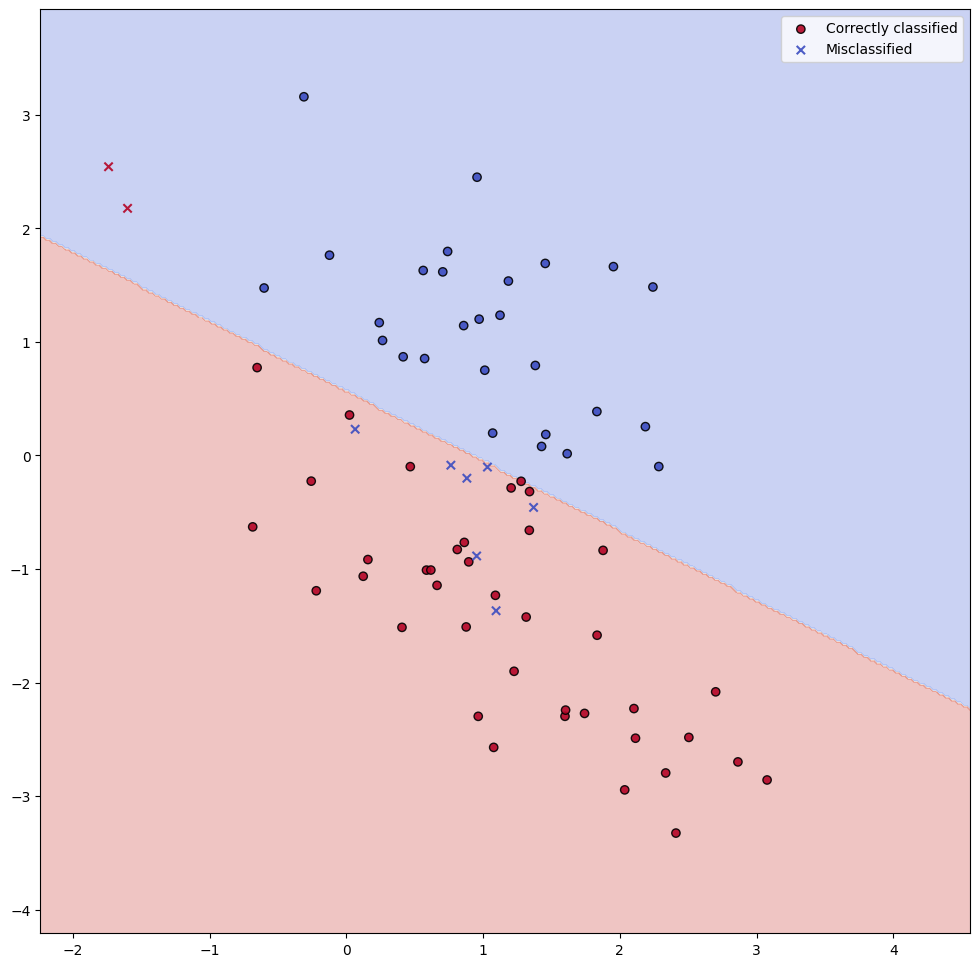

In [128]:
X_right, y_right = X_test[y_test == np.array(y_pred_class)], y_test[y_test == np.array(y_pred_class)]
X_wrong, y_wrong = X_test[y_test != np.array(y_pred_class)], y_test[y_test != np.array(y_pred_class)]


# Visualize the decision boundaries
# Define the mesh grid
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict using logistic regression on the mesh grid
Z = logistic_regressor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 12))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_right[:, 0], X_right[:, 1], c=y_right, cmap='coolwarm', alpha=0.9, label='Correctly classified', edgecolors='k')
plt.scatter(
        X_wrong[:, 0],
        X_wrong[:, 1],
        c=y_wrong,
        cmap='coolwarm',
        alpha=0.9,
        marker="x",
        label='Misclassified'
    )
plt.legend()
plt.show()

#### Exploring Gaussian Distributed Data

Below we generate three datasets with different Gaussian distributions.

First, we define a function to generate synthetic data. It creates two blobs centered
at `(0, 0)` and `(1, 1)`. Each blob is assigned a specific class. The dispersion of
the blob is controlled by the parameters `cov_class_1` and `cov_class_2`, that are the
covariance matrices used when generating the samples from the Gaussian distributions.



(2000, 2) (2000,)


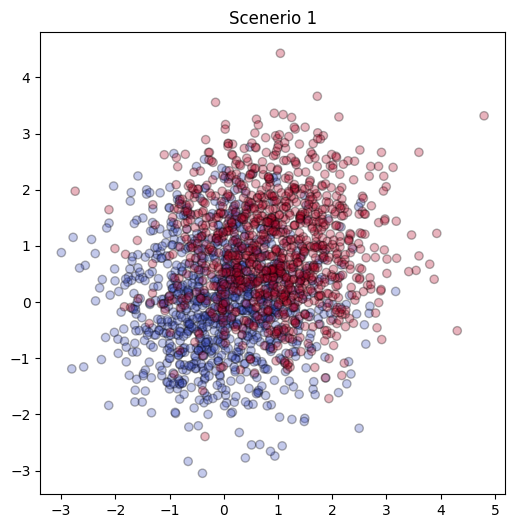

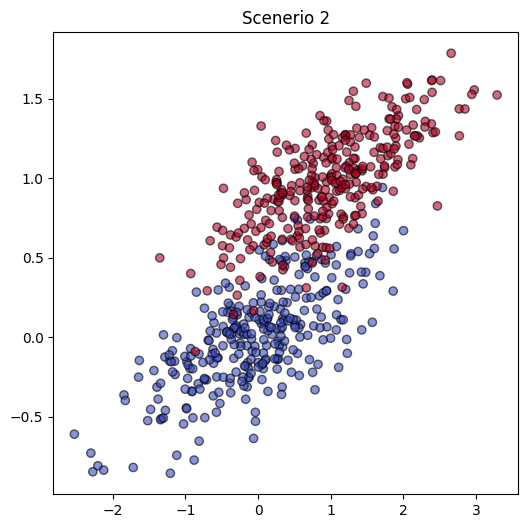

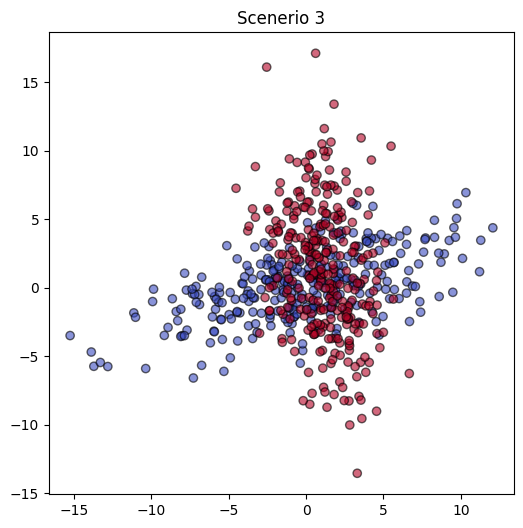

In [129]:
def make_data(n_samples, n_features, cov_class_1, cov_class_2, seed=0):
    rng = np.random.RandomState(seed)
    X = np.concatenate(
        [
            rng.randn(n_samples, n_features) @ cov_class_1,
            rng.randn(n_samples, n_features) @ cov_class_2 + np.array([1, 1]),
        ]
    )
    y = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])
    return X, y


covariance = np.array([[1, 0], [0, 1]])
X_1, y_1 = make_data(
    n_samples=1_000,
    n_features=2,
    cov_class_1=covariance,
    cov_class_2=covariance,
    seed=0,
)
covariance = np.array([[0.0, -0.23], [0.83, 0.23]])
X_2, y_2 = make_data(
    n_samples=300,
    n_features=2,
    cov_class_1=covariance,
    cov_class_2=covariance,
    seed=0,
)
cov_class_1 = np.array([[0.0, -1.0], [2.5, 0.7]]) * 2.0
cov_class_2 = cov_class_1.T
X_3, y_3 = make_data(
    n_samples=300,
    n_features=2,
    cov_class_1=cov_class_1,
    cov_class_2=cov_class_2,
    seed=0,
)

#PLOT DATASETS
plt.figure(figsize=(6, 6))
print(X_1.shape, y_1.shape)
import matplotlib.pyplot as plt
plt.scatter(X_1[:, 0], X_1[:, 1], c=y_1, cmap='coolwarm', edgecolors='k', alpha=0.3)
plt.title('Scenerio 1')#('Scenerio Covariance')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2, cmap='coolwarm', edgecolors='k', alpha=0.6)
plt.title('Scenerio 2')#('Shared Covariance')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3, cmap='coolwarm', edgecolors='k',alpha=0.6)
plt.title('Scenerio 3')#('Different Covariance')
plt.show()


**Exercise 4:** Match the plotted scenerios with the following cases  (1 Points)
- Shared Covariance: Scenario 2
- Different Covariance: Scenerio 3
- Isotropic Covariance: Scenerio 1


#### Remember LDA and QDA:

- **Multivariate LDA**:
$$
P(y = k \mid \mathbf{x}) \propto \exp\left( -\frac{1}{2} (\mathbf{x} - \mu_k)^\top \Sigma^{-1} (\mathbf{x} - \mu_k) \right)
$$

- **Multivariate LDA Decision Function**:
  $$
  \delta_k(\mathbf{x}) = \mathbf{x}^\top \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^\top \Sigma^{-1} \mu_k + \log P(y = k)
  $$
  - $ \mu_k $ is the mean vector for class $ k $,
  - $ \Sigma $ is the shared matrix ,
  - $ |\Sigma| $ is the determinant of $ \Sigma $,
  - $ P(y = k) $ is the prior probability for class $ k $.
  - Assumes $ \Sigma_1 = \Sigma_2 = \dots = \Sigma_k $. 
<br /><br /><br /><br />






- **Multivariate QDA**:
$$
P(y = k \mid \mathbf{x}) \propto \frac{1}{|\Sigma_k|^{1/2}} \exp\left( -\frac{1}{2} (\mathbf{x} - \mu_k)^\top \Sigma_k^{-1} (\mathbf{x} - \mu_k) \right)
$$


- **QDA Decision Function**:
  $$
  \delta_k(\mathbf{x}) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (\mathbf{x} - \mu_k)^\top \Sigma_k^{-1} (\mathbf{x} - \mu_k) + \log P(y = k)
  $$
  - $ \mu_k $ is the mean vector for class $ k $,
  - $ \Sigma_k $ is the covariance matrix for class $ k $,
  - $ |\Sigma_k| $ is the determinant of $ \Sigma_k $,
  - $ P(y = k) $ is the prior probability for class $ k $.
  - Assumes $ \Sigma_1 \neq \Sigma_2 \neq \dots \neq \Sigma_k \ $.


**Exercise 5:** Assume that we need to perform binary classification for plotted Scenarios 1, 2, and 3. Choose one classification method (QDA or LDA) to use in each scenario. If you believe both methods are suitable, always select the simpler one.  (2 Points)
- Scenerio 1: LDA because isotropic covariance, aligns with the shared covariance that is in LDA
- Scenerio 2: LDA because it is shared covariance and LDA is a better choice for shared covariance
- Scenerio 3: QDA becaue it is difference of two models and QDA is applying covariance to each model separetely.



#### See the performance of LDA and QDA for each case

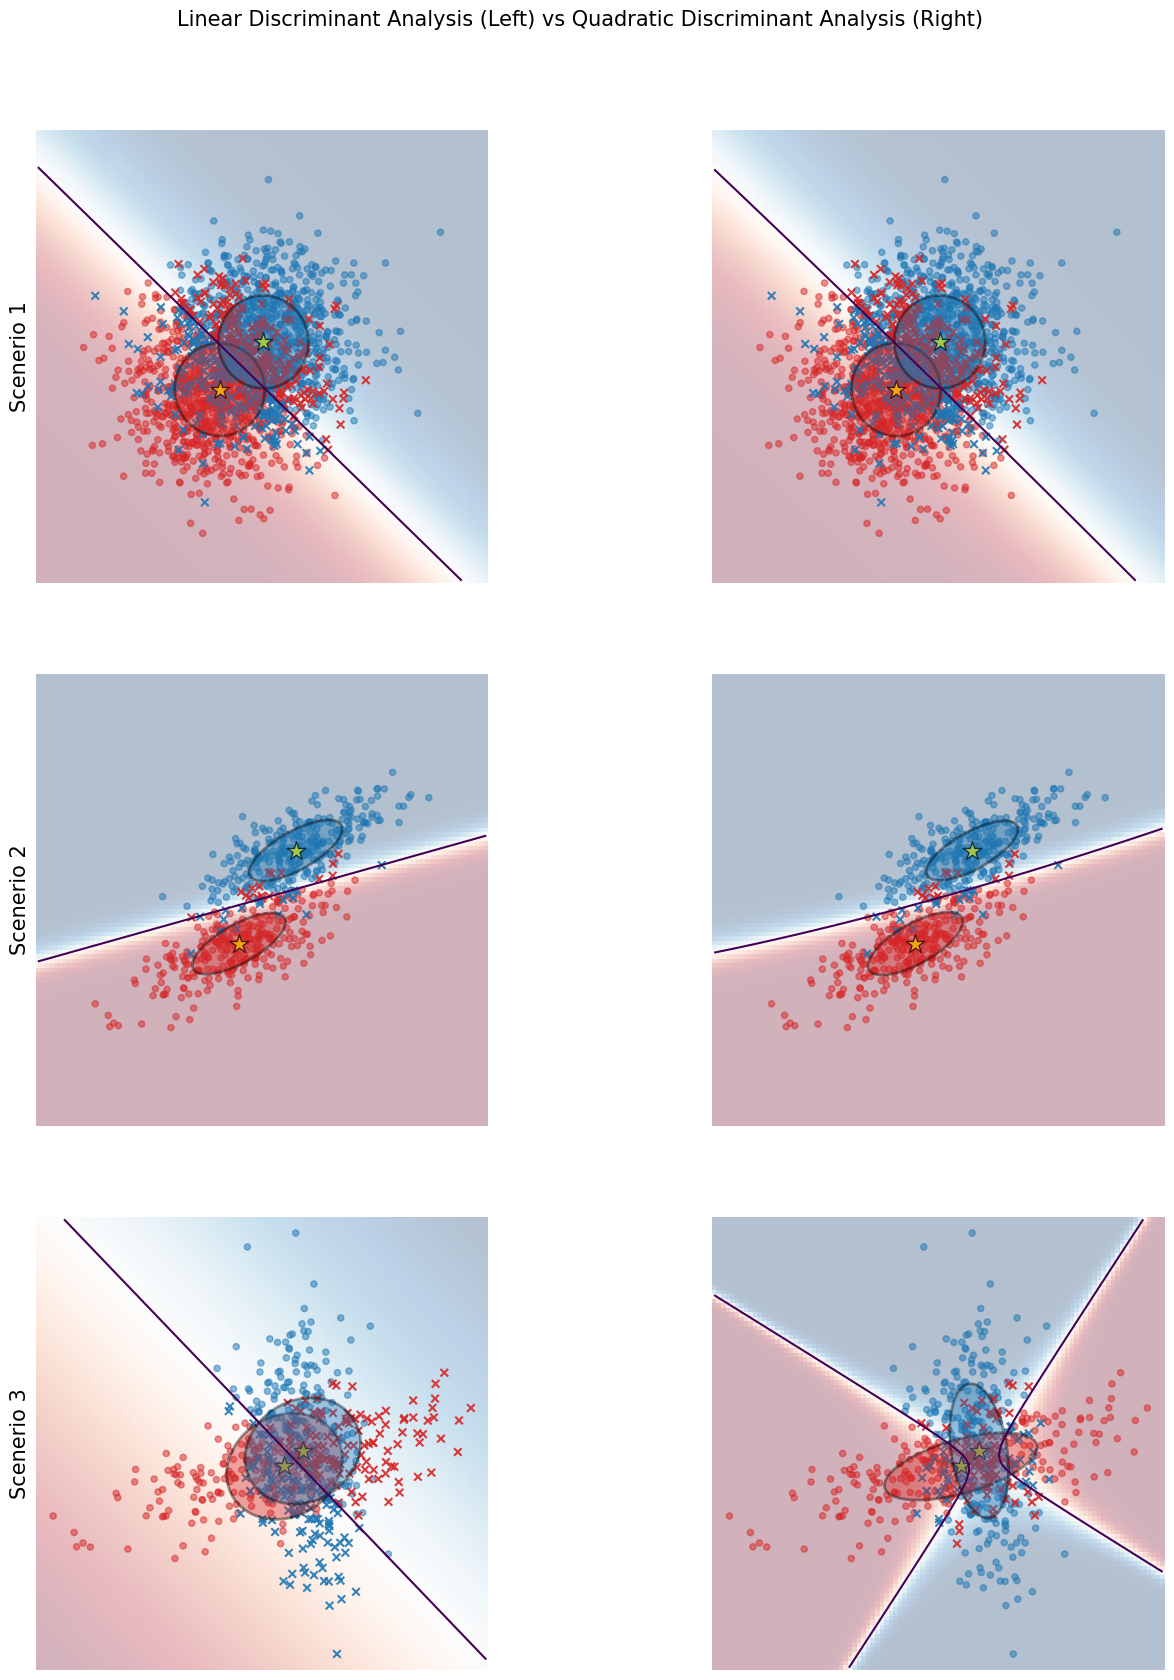

In [130]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

fig, axs = plt.subplots(nrows=3, ncols=2, sharex="row", sharey="row", figsize=(16,20))
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

for ax_row, X, y in zip(
    axs,
    (X_1, X_2, X_3),
    (y_1, y_2, y_3),
):
    lda.fit(X, y)
    plot_result(lda, X, y, ax_row[0])
    qda.fit(X, y)
    plot_result(qda, X, y, ax_row[1])

axs[0, 0].set_ylabel("Scenerio 1", fontsize=15)
axs[1, 0].set_ylabel("Scenerio 2", fontsize=15)
axs[2, 0].set_ylabel("Scenerio 3", fontsize=15)
fig.suptitle(
    "Linear Discriminant Analysis (Left) vs Quadratic Discriminant Analysis (Right)",
    y=0.94,
    fontsize=15,
)
plt.show()

<span style="color:red"> Task 6: For each of the scenerios plotted above, compare behaviour of decision boundaries with your words for LDA (left column) and QDA (right column).  (2 Points)
- Scenario 1: LDA works well because the covariance matrix is spherical, so the discriminant boundary is aligned with the perpendicular bisector between the two means. QDA also works but doesn’t show any advantage since it estimates two almost identical covariance matrices.
- Scenario 2: LDA is still good, but the discriminant boundary only passes through the middle of the two means. QDA works but isn’t perfect because the data doesn’t highlight its flexibility.
- Scenario 3: QDA is better than LDA here because it fits two covariance matrices, creating a non-linear boundary that separates the classes better. LDA underfits since it assumes the same covariance matrix for both classes.


